In [2]:
#!pip install matplotlib --quiet
#!pip install scipy --quiet
#!pip install pandas --quiet

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from scipy.spatial.distance import pdist
import numpy as np
from scipy.spatial import distance_matrix
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#### Tipos de distancias
**Distancia de Manhattan:** numero de calles o manzanas que separan un punto de otro.la distancia entre dos puntos es la suma de las diferencias absolutas de sus coordenadas. Es decir, es la suma de las longitudes de los dos catetos del triángulo rectangulo.

**Distancia Euclidea** d(A,B) entre los puntos A y B, ubicados sobre una recta, como la raíz cuadrada del cuadrado de las diferencias de sus coordenadas

**Distancia de Minkowski**

In [4]:
data =  pd.read_csv("../datasets/movies/movies.csv",sep=";")

In [5]:
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [6]:
movies = data.columns.values.tolist()[1:]

In [7]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [8]:
dd1 = distance_matrix(data[movies],data[movies],p=1)
dd2 = distance_matrix(data[movies],data[movies],p=2)
dd3 = distance_matrix(data[movies],data[movies],p=3)

In [9]:
def dd_to_df(dd,col_name):
    return pd.DataFrame(dd,index=col_name,columns=col_name)

In [10]:
df_dd1 = dd_to_df(dd1,data["user_id"])
df_dd2 = dd_to_df(dd2,data["user_id"])
df_dd3 = dd_to_df(dd3,data["user_id"])

In [11]:
data[movies[0]]

0    1.2
1    2.1
2    7.4
3    5.6
4    1.5
5    2.5
6    2.0
7    1.8
8    2.6
9    1.5
Name: star_wars, dtype: float64

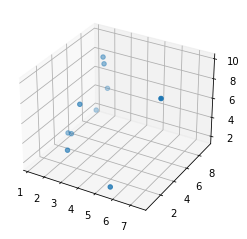

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=data[movies[0]],ys=data[movies[1]],zs=data[movies[2]])

#### Normalizacion de distancias
Cuando las variables no tienen el mimsmo rango.



### Clustering
Se dividen en métodos aglomerativos o disociativos.

* Agrupar clusters para crear uno nuevo
* Separar cluster existente para dar origen a otros dos,para que sucesivamente se lleve a cabo se lleve el proceso de aglomeración o division minimizando alguna distancia o maximizando medida de similitud.

**Aglomerativos:** se inicia con un numero de clusters igual al numero de individuos o puntos, a partir de estos clusters individuales se van formando grupos de forma ascendente hasta que al final del proceso se llegue a un unico cluster comun.

**Disociativos:** se inicia con un unico cluster englobando todos los puntos del dataset y a partir de sucesivas divisiones se van formando grupos cada vez mas pequeños.Al final del proceso tendremos tantos grupos como casos tratados.


#### Métodos de enlace
* Enlace simple: la distancia entre dos clusters es el minimo de las distancias entre cualquier par de puntos del cluster1 y el cluster 2

* Enlace completo: juntar los clusters basandonos en el maximo de las distancias entre cualquier par de puntos del cluster 1 y el cluster 2.

* Enlace promedio: la distancia entre dos clusters es el promedio de las distancias entre cualquier dos puntos del cluster 1 y el cluster 2.

* Enlace del centroide: la distancia entre dos clusters es la distancia entre el centroide (punto medio) del cluster1 y el centroide (punto medio) del cluster2.

* Enlace de Ward: método jerarquico donde en cada etapa se unen los dos clusters que provoquen un menor incremento en el valor total de la suma de los cuadrados de las varianzas. Minimizamos para cada cluster las distancias de los puntos que lo conforman al centroide.

### Clustering jerarquico

Metodo aglomerativo donde cada punto empieza siendo un unico cluster y en cada paso los vamos juntando hasta tener u unico cluster basado en las similitudes entre observaciones.

**Pasos**

1. Empezamos con cada obervacion en un cluster (tenemos N clusters)
2. Encontramos la menor distancia en la matriz de distancias y unimos las dos observaciones en un nuevo cluster
3. Recalculamos las distancias entre los clusters antiguos y el nuevo recien creado con alguno de los metodos de enlace
4. Repetimos los pasos 2 y 3 hasta tener un unico cluster con las N observaciones

In [13]:
Z = linkage(data[movies],method="ward")

In [14]:
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

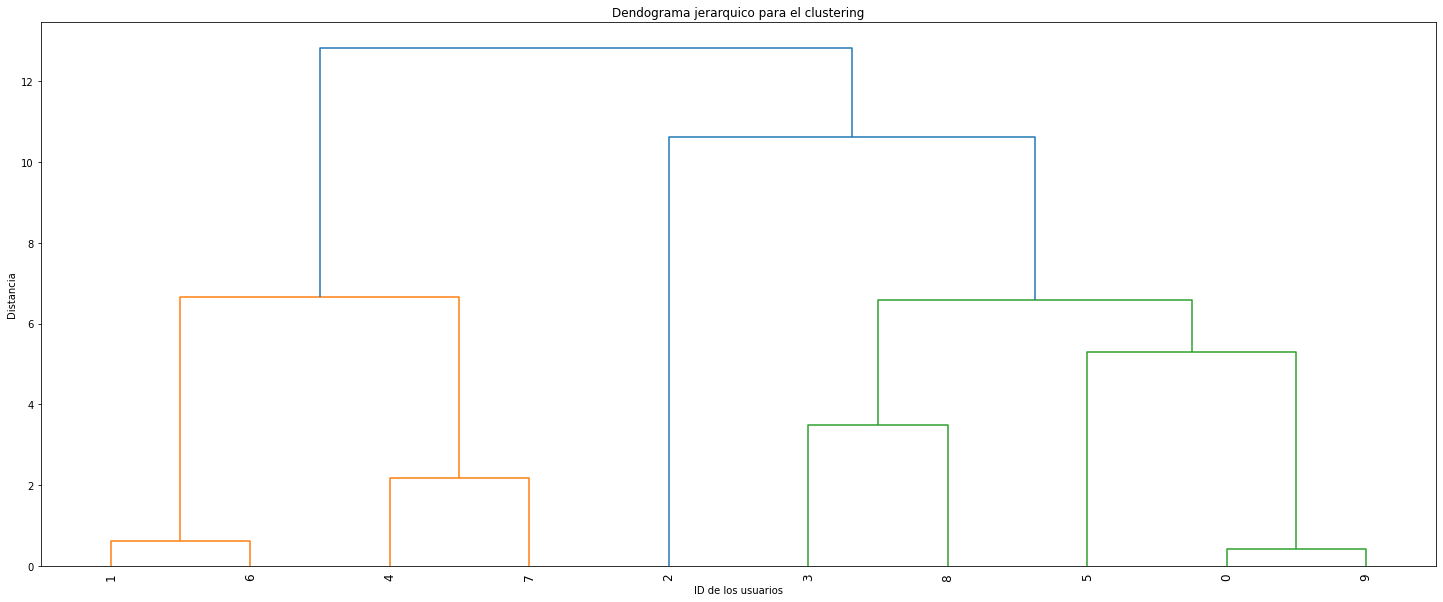

In [15]:
plt.figure(figsize=[25,10])
plt.title("Dendograma jerarquico para el clustering")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90)
plt.show()

(150, 2)


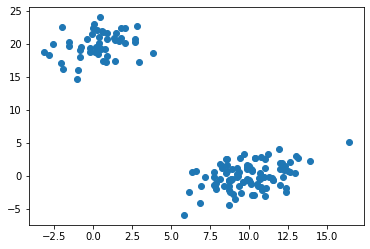

In [16]:
np.random.seed(4711)

a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])


comprobar el coeficiente de correlacion cophenet, el cual compara las distancias dos a dos de los puntos con las que se llevaron a cabo en el clusterin jerarquico, entre mas similar sea 1 es mucho mejor ya que se conservan las distancias originales.

  The cophenetic distance between two observations that have been clustered is defined to be the intergroup dissimilarity at which the two observations are first combined into a single cluster. Note that this distance has many ties and restrictions.

In [17]:
Z = linkage(X,"ward")
c, coph_dist = cophenet(Z,pdist(X))

In [18]:
c

0.9800148387574268

In [19]:
Z[152-len(X)]

array([33.        , 68.        ,  0.07106779,  2.        ])

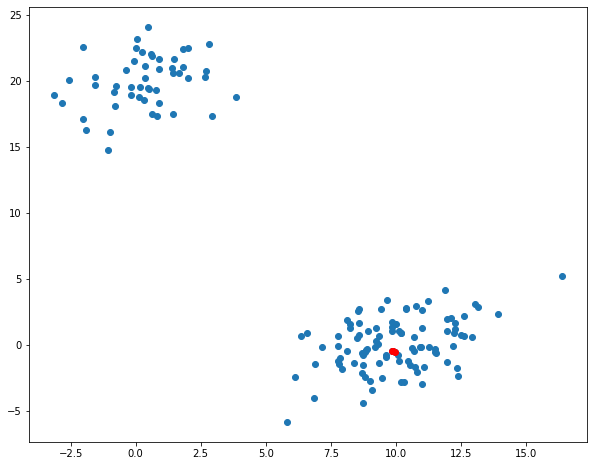

In [20]:
idx = [33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idx,0],X[idx,1],c='r')
plt.show()

### Dendrograma

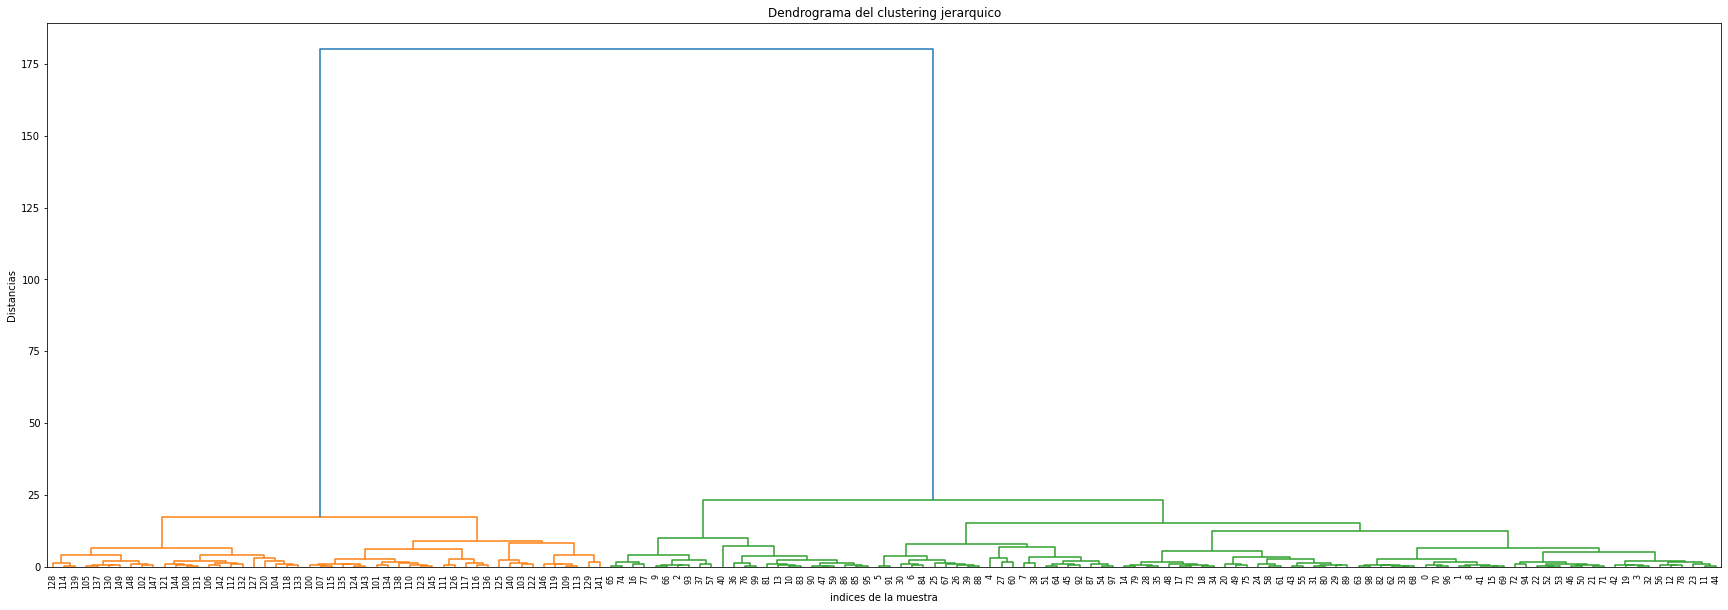

In [21]:
plt.figure(figsize=(30,10))
plt.title("Dendrograma del clustering jerarquico")
plt.xlabel("indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8.0)
plt.show()

In [22]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

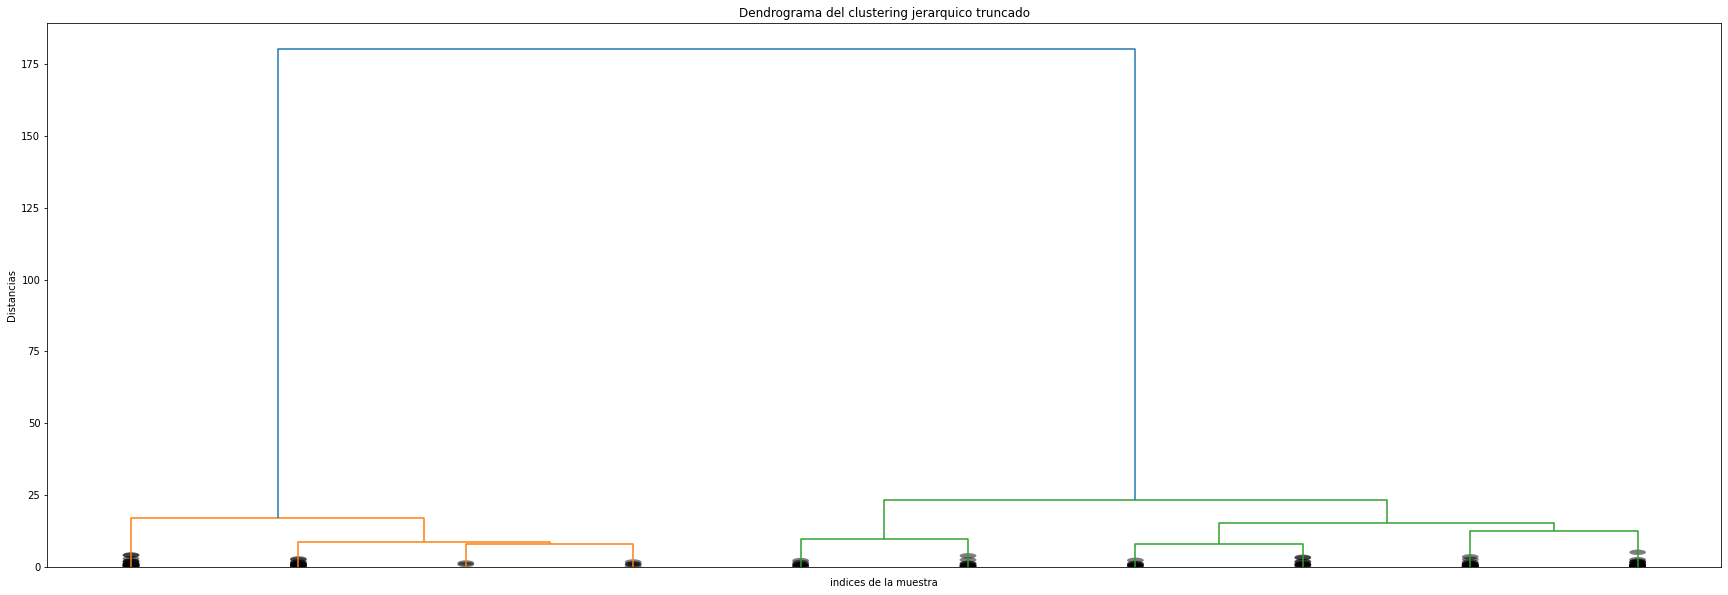

In [23]:
plt.figure(figsize=(30,10))
plt.title("Dendrograma del clustering jerarquico truncado")
plt.xlabel("indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8.0,truncate_mode='lastp',p=10,show_leaf_counts=False,show_contracted=True)
plt.show()

In [49]:
def dendogram_tune(*args,**kwargs):
    max_d = kwargs.pop("max_distance",None)
    if max_d and "color_threshold" not in kwargs:
        kwargs[ "color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above",0)
    
    ddata = dendrogram(*args,**kwargs)

    if not kwargs.get("no_plot",False):
        plt.title("Clustering jerarquico dendrograma truncado")
        plt.xlabel("indice del dataset")
        plt.ylabel("distancia")

        for i,d,c in zip(ddata["icoord"],ddata["dcoord"],ddata["color_list"]):
            x = 0.5*sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate("%.3g"%y,(x,y),xytext=(0,-5),textcoords="offset points",
                             va="top",ha="center" )
    if max_d:
        plt.axhline(y=max_d,c='k')
    return ddata


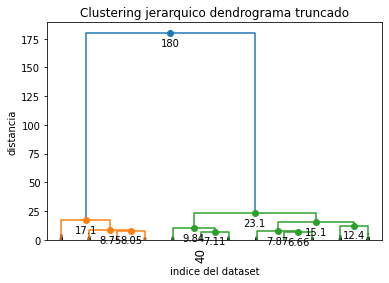

In [25]:
dendogram_tune(Z,truncate_mode='lastp',p=12,leaf_rotation=90.,leaf_font_size=12.,show_leaf_counts=False,show_contracted=True)
plt.show()

#### metodo de la inconsistencia

comparar cada altura a las que se juntan los clusters con la altura promedio y normalizar con la desviacion estandar

inconsistency_i = (h_i - avg(h_i))/std(h_i)) **

** de los niveles anteriores especificados con depth

In [26]:
from scipy.cluster.hierarchy import inconsistent

In [27]:
depth = 5
incons = inconsistent(Z,5)

#### Método del codo

intenta buscar el step del clustering donde la aceleracion del crecimiento de la distancia es mayor (distancia de un cluster a otro)

In [33]:
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

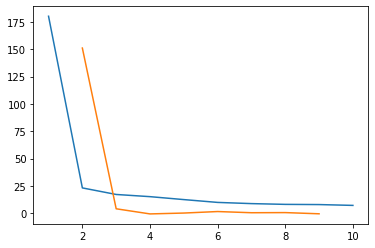

2


In [37]:
last = Z[-10:,2]
last_rev = last[::-1]
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print(k)

De las diferencias en los incrementos, se identifica que se forma la aceleracion máxima con 2 clusters, por tanto el numero optimo de clusters es 2.

Este metodo necesita de almenos dos clusters, por lo que el resultado nunca será que solo se necesita un cluster para agrupar los puntos

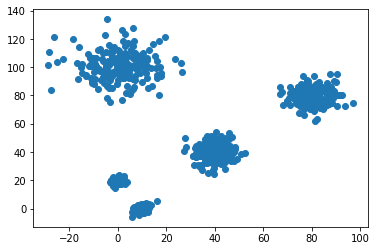

In [45]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]],size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]],size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]],size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [46]:
Z2 = linkage(X2,'ward')

In [50]:
plt.figure(figsize=(10,10))

dendogram_tune(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_leaf_counts=False,
    show_contracted=True,
    max_d=170)
plt.show()

TypeError: dendrogram() got an unexpected keyword argument 'max_d'

<Figure size 720x720 with 0 Axes>

### clusters y sus elementos

In [51]:
from scipy.cluster.hierarchy import fcluster

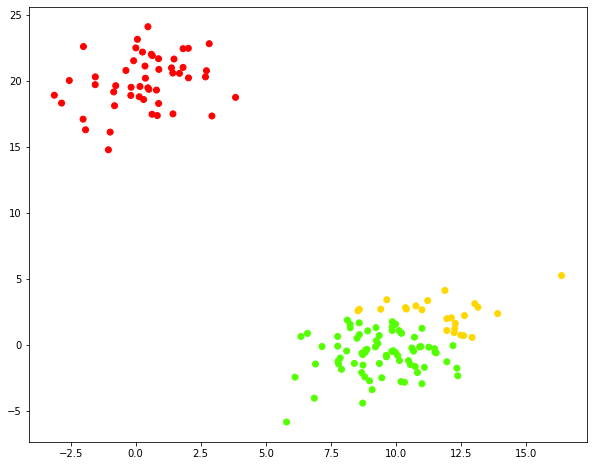

In [52]:
k=3
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c = fcluster(Z,k,criterion='maxclust'),cmap='prism')

max_d = 170
plt.figure(figsize=(10,8))
plt.scatter(X2[:,0],X2[:,1],c = fcluster(Z,max_d,criterion='maxclust'),cmap='prism')

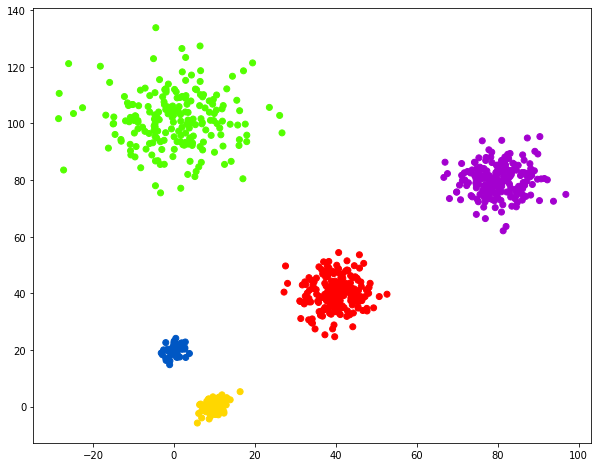

In [55]:
max_d = 170
plt.figure(figsize=(10,8))
plt.scatter(X2[:,0],X2[:,1],c = fcluster(Z2,max_d,criterion='distance'),cmap='prism')